<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Finalized-ACP-500-164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [1]. Google Drive Initialization:

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
ls

0_FINAL_anti_peptide_model_AC240-tensorboard.ipynb
0_FINAL_anti_peptide_model_ACP740-tensorboard.ipynb
500-164.h5
544_encoded_sequences_740.npy
ACP164.npy
ACP240_labels.npy
acp240.txt
ACP500.npy
ACP740_labels.npy
ACP-740-tensorboard.ipynb
acp740.txt
blosum62-acp240.npy
blosum62-acp740.npy
BPF_coded_ACP164_sequences.npy
BPF_coded_ACP240_sequences.npy
BPF_coded_ACP500_sequences.npy
BPF_coded_ACP740_sequences.npy
kmer_k_3_ACP240.npy
kmer_k_3_ACP740.npy
logs/
mACP-240.ipynb
mACP-740.ipynb
model-240.png
model-500-164.png
model-740.png
model.png
multichannel.png
physico_coded_ACP164_sequences.npy
physico_coded_ACP240_sequences.npy
physico_coded_ACP500_sequences.npy
physico_coded_ACP740_sequences.npy


In [16]:
cd 'drive/My Drive/Colab-Notebooks'

[Errno 2] No such file or directory: 'drive/My Drive/Colab-Notebooks'
/content/drive/My Drive/Colab-Notebooks


In [17]:
ls -1

0_FINAL_anti_peptide_model_AC240-tensorboard.ipynb
0_FINAL_anti_peptide_model_ACP740-tensorboard.ipynb
500-164.h5
544_encoded_sequences_740.npy
ACP164.npy
ACP240_labels.npy
acp240.txt
ACP500.npy
ACP740_labels.npy
ACP-740-tensorboard.ipynb
acp740.txt
blosum62-acp240.npy
blosum62-acp740.npy
BPF_coded_ACP164_sequences.npy
BPF_coded_ACP240_sequences.npy
BPF_coded_ACP500_sequences.npy
BPF_coded_ACP740_sequences.npy
kmer_k_3_ACP240.npy
kmer_k_3_ACP740.npy
logs/
mACP-240.ipynb
mACP-740.ipynb
model-240.png
model-500-164.png
model-740.png
model.png
multichannel.png
physico_coded_ACP164_sequences.npy
physico_coded_ACP240_sequences.npy
physico_coded_ACP500_sequences.npy
physico_coded_ACP740_sequences.npy


## [2]. Load Deep Learning API (Keras):

In [18]:
# Deep Neural Networks:
from keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                          Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, concatenate,
                          SimpleRNN, LSTM, GRU, Bidirectional, Embedding)
from keras.regularizers import (l1, l2, l1_l2)
from keras.optimizers import (RMSprop, Adam, SGD)
from keras.models import (Sequential, Model)
import keras; print('We\'re using Keras version: {}.'.format(keras.__version__))

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, mean_squared_error, 
                             matthews_corrcoef, precision_score)

#Utilities
from keras.callbacks import EarlyStopping, TensorBoard
from keras.utils import to_categorical as labelEncoding # Usages: Ytrain = labelEncoding(Ytrain, dtype=int)
from keras.utils import plot_model                      # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
#end-import

We're using Keras version: 2.2.5.


## [3]. Load Datasets:

In [19]:
D = 20    # terminus_length

X1train = np.load('BPF_coded_ACP500_sequences.npy')
X2train = np.load('physico_coded_ACP500_sequences.npy')
X3train = np.load('ACP500.npy')

X3train = X3train.reshape(-1, 20, 11)

print(X1train.shape)
print(X2train.shape)
print(X3train.shape)
print('### --- --- --- --- --- ###')

X2train = X2train[:,:,0:20]
print(X1train.shape)
print(X2train.shape)
print(X3train.shape)

### -----------------------------------------------------
X1test = np.load('BPF_coded_ACP164_sequences.npy')
X2test = np.load('physico_coded_ACP164_sequences.npy')
X3test = np.load('ACP164.npy')

X3test = X3test.reshape(-1, 20, 11)

print(X1test.shape)
print(X2test.shape)
print(X3test.shape)

X2test = X2test[:,:,0:20]

print(X1test.shape)
print(X2test.shape)
print(X3test.shape)

print('### --- --- --- --- --- ###')

# ACP {500, 164}
Ytrain  = [0 for _ in range(250)]
Ytrain += [1 for _ in range(250)]
Ytrain  = np.array(Ytrain)

Ytest  = [0 for _ in range(82)]
Ytest += [1 for _ in range(82)]


Ytrain = labelEncoding(Ytrain, dtype=int)
Ytest  = labelEncoding(Ytest, dtype=int)

(500, 20, 11)
(500, 7, 207)
(500, 20, 11)
### --- --- --- --- --- ###
(500, 20, 11)
(500, 7, 20)
(500, 20, 11)
(164, 20, 11)
(164, 7, 207)
(164, 20, 11)
(164, 20, 11)
(164, 7, 20)
(164, 20, 11)
### --- --- --- --- --- ###


In [0]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['acc'], label='Training Accuracy')
    plt.plot(results.history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
#end-def

## [4]. Generate Model:

In [0]:
def Network():
    ### Head-1:
    input1 = Input(shape=(20, 11)) # T=20

    # x = Conv1D(filters=64, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input1)
    # x = BatchNormalization()(x)
    # x = Dropout(rate=0.70)(x)

    # x = Conv1D(filters=32, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    # x = BatchNormalization()(x)
    # x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=16, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input1)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=12, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.65)(x)

    x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.60)(x)

    head1 = Flatten()(x)


    ### Head-2:
    input2 = Input(shape=(7, 20)) # T=7

    # x = Conv1D(filters=32, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input2)
    # x = BatchNormalization()(x)
    # x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=16, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(input2)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=12, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.65)(x)

    x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.60)(x)

    head2 = Flatten()(x)


    ### Head-3:
    input3 = Input(shape=(20, 11))

    # x = Conv1D(filters=64, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(input3)
    # x = BatchNormalization()(x)
    # x = Dropout(rate=0.70)(x)

    # x = Conv1D(filters=32, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    # x = BatchNormalization()(x)
    # x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=16, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(input3)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.70)(x)

    x = Conv1D(filters=12, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.65)(x)

    x = Conv1D(filters=8, kernel_size=3, padding='same', data_format='channels_first', activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.60)(x)

    head3 = Flatten()(x)


    # merge
    merge = concatenate(inputs=[head1, head2, head3])

    # output = Dense(units=32, activation='relu',)(merge)
    # output = BatchNormalization()(output)
    # output = Dropout(rate=0.0)(output)

    output = Dense(units=16, activation='relu',)(merge)
    output = BatchNormalization()(output)
    output = Dropout(rate=0.70)(output)

    x = Conv1D(filters=12, kernel_size=3, padding='same', data_format='channels_first',activation='relu',)(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.65)(x)

    output = Dense(units=8, activation='relu',)(output)
    output = BatchNormalization()(output)
    output = Dropout(rate=0.60)(output)

    output = Dense(units=2, activation='softmax')(output)

    return Model(inputs=[input1, input2, input3], outputs=[output])
#end-def

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_100 (InputLayer)          (None, 20, 11)       0                                            
__________________________________________________________________________________________________
input_101 (InputLayer)          (None, 7, 20)        0                                            
__________________________________________________________________________________________________
input_102 (InputLayer)          (None, 20, 11)       0                                            
__________________________________________________________________________________________________
conv1d_295 (Conv1D)             (None, 16, 11)       976         input_100[0][0]                  
___________________________________________________________________________________________

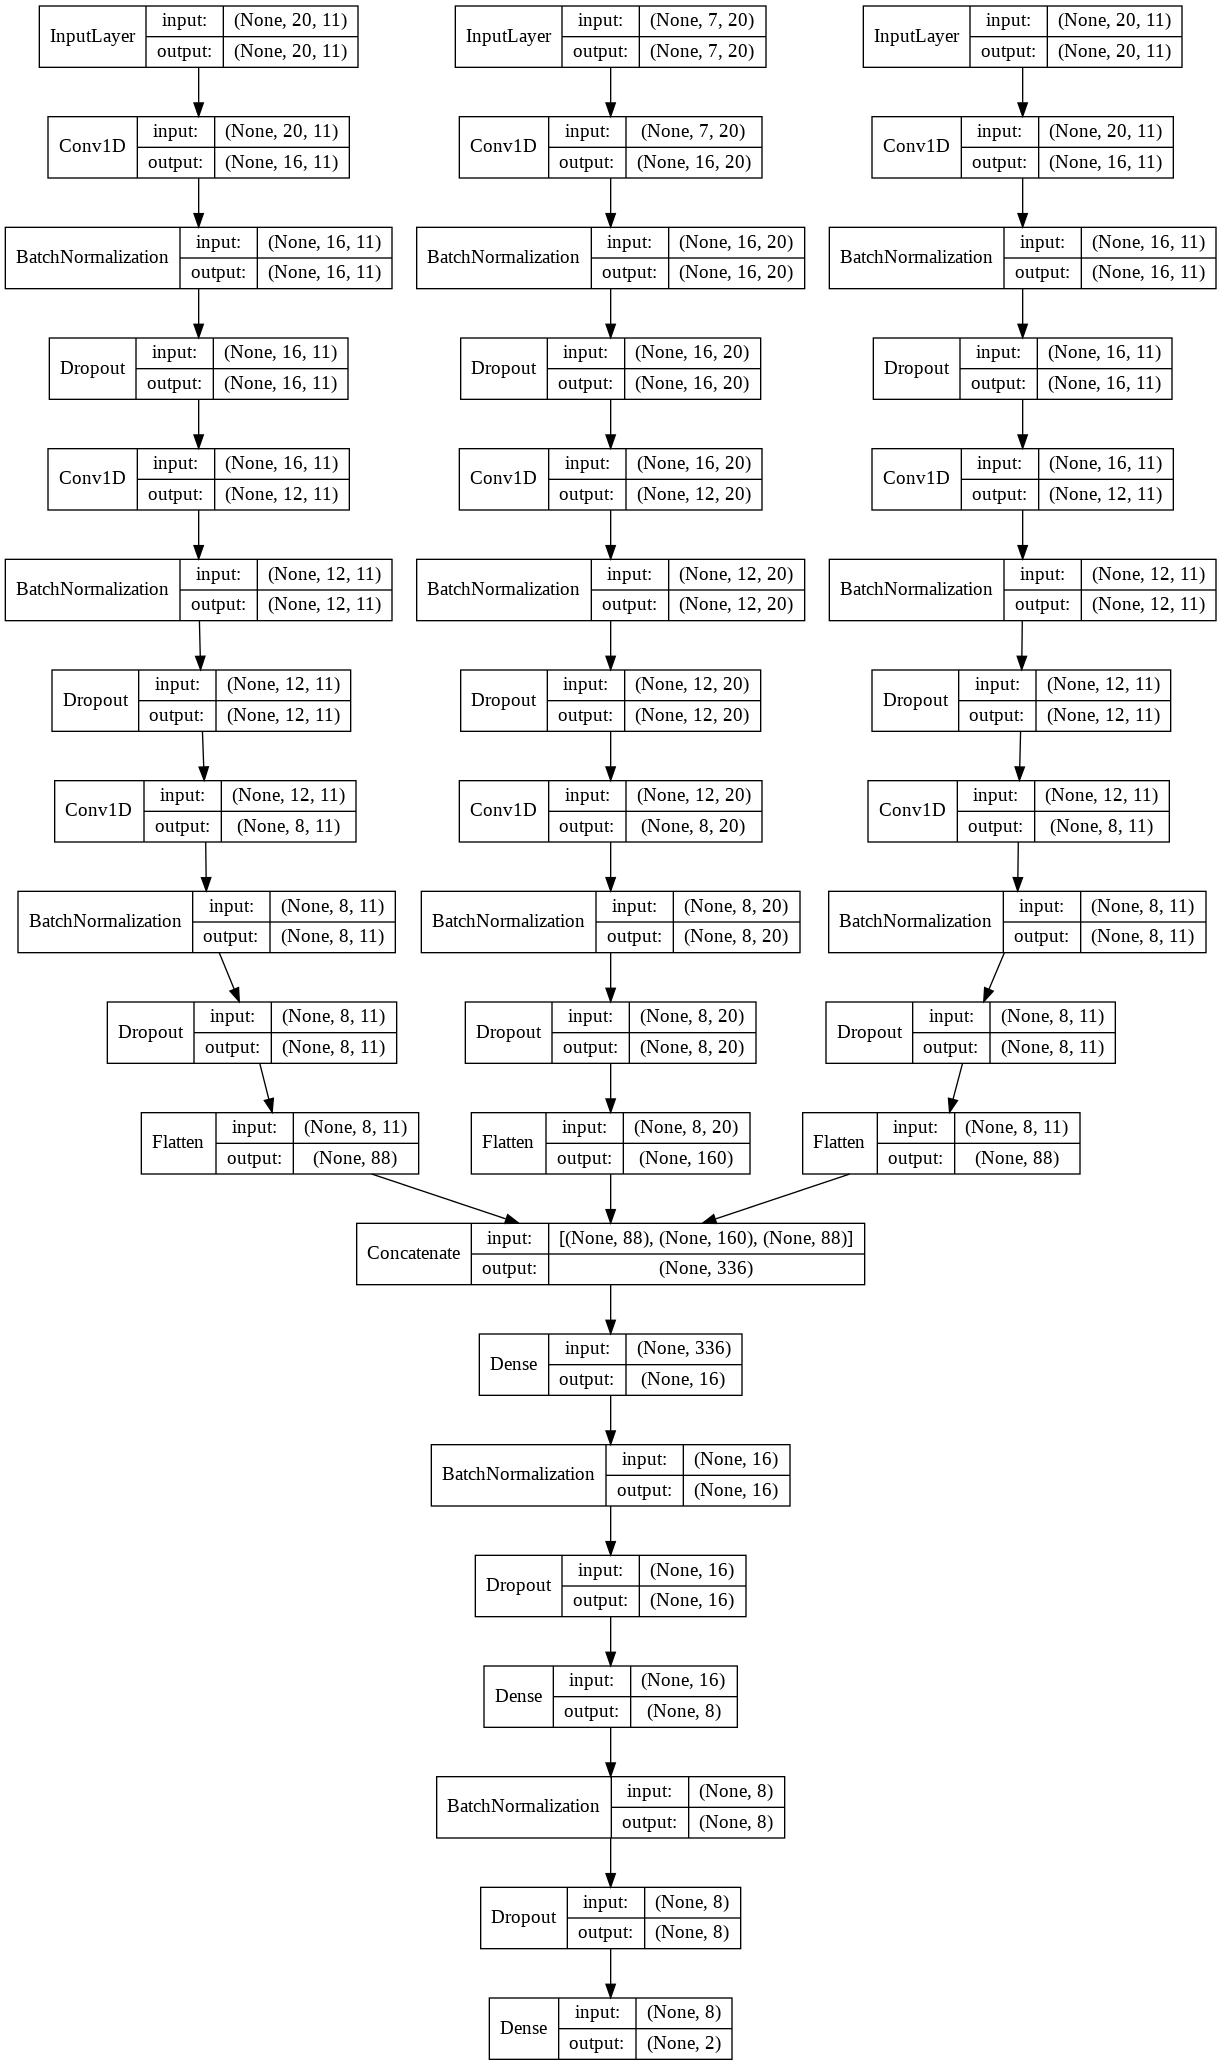

In [77]:
model = Network()
model.summary()
plot_model(model, to_file='model-500-164.png', show_shapes=True, show_layer_names=False, expand_nested=True)

## [5]. Run Model:

In [78]:
# Setting epoch and batch number
setEpochNumber     = 600     # 2,500 performed well.
setBatchSizeNumber = 16

# Compile Model:
model = Network()
model.compile(optimizer=Adam(lr=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
              # Adam(lr=0.0001)

# Run Model:
results = model.fit(x=[X1train, X2train, X3train], y=[Ytrain], validation_data=([X1test, X2test, X3test], [Ytest]), epochs=setEpochNumber, batch_size=setBatchSizeNumber, verbose=1)

# Evaluate the Model:
accuracy = model.evaluate(x=[X1test, X2test, X3test], y=Ytest)

# Performance Metices:
Yactual = Ytest.argmax(axis=1)
Yp = model.predict([X1test, X2test, X3test])
Yp = Yp.argmax(axis=1)

CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
TN, FP, FN, TP = CM.ravel()


print('Accuracy: {:.2f}'.format(accuracy[1]))
print('MCC: {:.2f}'.format(matthews_corrcoef(y_true=Yactual, y_pred=Yp)))
print('Sensitivity: {0:.4f}'.format(TP / (TP + FN)))
print('Specificity: {0:.4f}'.format(TN / (TN + FP)))
print('Precision: {0:.4f}'.format(precision_score(y_true=Yactual, y_pred=Yp)))


# Performance Plot
lossPlot(results)
accuracyPlot(results)

Train on 500 samples, validate on 164 samples
Epoch 1/600
500/500 [==============================] - 24s 47ms/step - loss: 1.0351 - acc: 0.4800 - val_loss: 0.7216 - val_acc: 0.5000
Epoch 2/600
500/500 [==============================] - 1s 1ms/step - loss: 0.8176 - acc: 0.5060 - val_loss: 0.7036 - val_acc: 0.5000
Epoch 3/600
500/500 [==============================] - 1s 1ms/step - loss: 0.7671 - acc: 0.5000 - val_loss: 0.6969 - val_acc: 0.5000
Epoch 4/600
500/500 [==============================] - 1s 1ms/step - loss: 0.7341 - acc: 0.5100 - val_loss: 0.6971 - val_acc: 0.5000
Epoch 5/600
500/500 [==============================] - 1s 1ms/step - loss: 0.7164 - acc: 0.5060 - val_loss: 0.6986 - val_acc: 0.5000
Epoch 6/600
500/500 [==============================] - 1s 1ms/step - loss: 0.6924 - acc: 0.5120 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 7/600
500/500 [==============================] - 1s 1ms/step - loss: 0.6901 - acc: 0.5420 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 8/600
500/500 [

KeyboardInterrupt: ignored

In [0]:
model.save('500-164.h5')

In [31]:
help(RMSprop)

Help on class RMSprop in module keras.optimizers:

class RMSprop(Optimizer)
 |  RMSProp optimizer.
 |  
 |  It is recommended to leave the parameters of this optimizer
 |  at their default values
 |  (except the learning rate, which can be freely tuned).
 |  
 |  # Arguments
 |      lr: float >= 0. Learning rate.
 |      rho: float >= 0.
 |      epsilon: float >= 0. Fuzz factor. If `None`, defaults to `K.epsilon()`.
 |      decay: float >= 0. Learning rate decay over each update.
 |  
 |  # References
 |      - [rmsprop: Divide the gradient by a running average of its recent magnitude
 |         ](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)
 |  
 |  Method resolution order:
 |      RMSprop
 |      Optimizer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lr=0.001, rho=0.9, epsilon=None, decay=0.0, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_config(self)
 |  
 |  get_updates(sel